In [1]:
import os
import sys
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch
import AE_Stats
import matplotlib.pyplot as plt
from Naive_DAE import Naive_DAE,Dropout_DAE

from load_data_fn import load_data,load_data_no_filter,prep_ttbar

from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader, TensorDataset


In [2]:
egun =load_data_no_filter(1)

In [3]:
ttbar = prep_ttbar(81)

# Distribution of calcQ

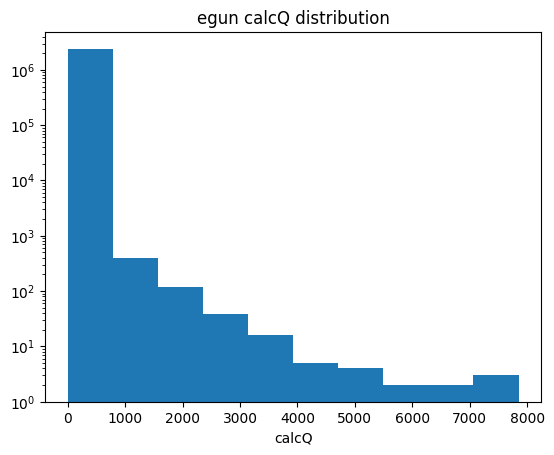

In [4]:
plt.title('egun calcQ distribution')
plt.hist(torch.flatten(egun[0:50000,0:48]),log = True)
plt.xlabel('calcQ')
plt.show()

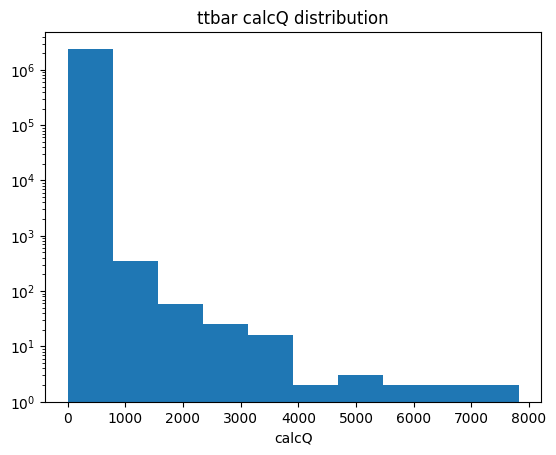

In [5]:
plt.title('ttbar calcQ distribution')
plt.hist(torch.flatten(ttbar[0:50000,0:48]),log = True)
plt.xlabel('calcQ')
plt.show()

# Mean Values

In [6]:
print(f'mean egun calq {torch.mean(egun[:,0:48])}')
print(f'mean ttbar calcq {torch.mean(ttbar[:,0:48])}')

mean egun calq 5.704294204711914
mean ttbar calcq 8.01089859008789


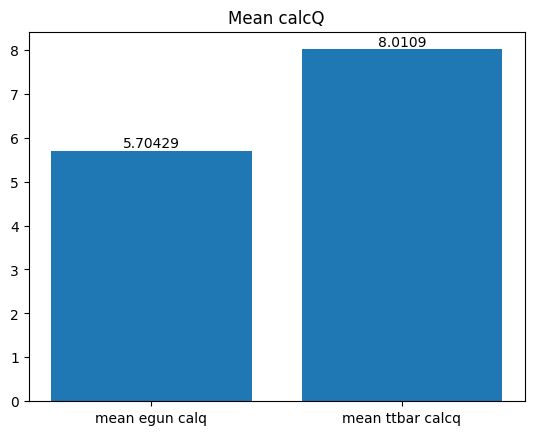

In [35]:
fig, ax = plt.subplots()
plt.title('Mean calcQ')
bars = ax.bar(['mean egun calq','mean ttbar calcq'],[torch.mean(egun[:,0:48]),torch.mean(ttbar[:,0:48])])
ax.bar_label(bars)
plt.show()

In [26]:
print(f'std egun calq {torch.std(egun[:,0:48])}')
print(f'std ttbar calcq {torch.std(ttbar[:,0:48])}')

std egun calq 35.943416595458984
std ttbar calcq 34.96427917480469


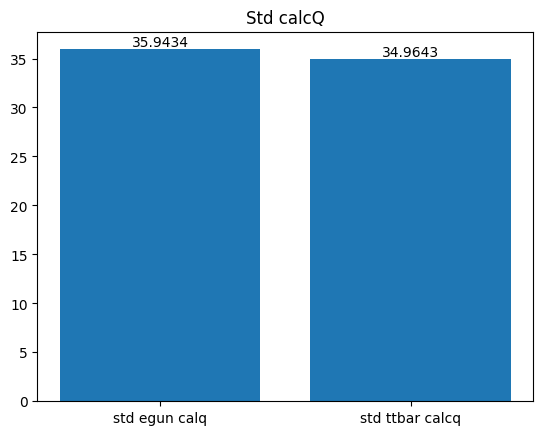

In [37]:
fig, ax = plt.subplots()
plt.title('Std calcQ')
bars = ax.bar(['std egun calq','std ttbar calcq'],[torch.std(egun[:,0:48]),torch.std(ttbar[:,0:48])])
ax.bar_label(bars)
plt.show()

In [28]:
print(f'mean calq sum egun calq {torch.mean(torch.sum(egun[:,0:48],dim=1))}')
print(f'mean calq ttbar calcq {torch.mean(torch.sum(ttbar[:,0:48],dim=1))}')

mean calq sum egun calq 273.8271789550781
mean calq ttbar calcq 384.5542907714844


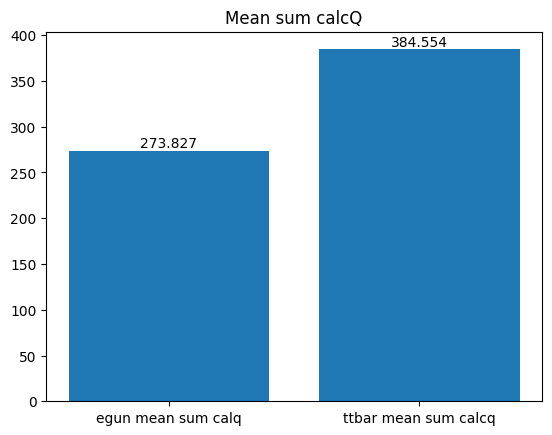

In [38]:
fig, ax = plt.subplots()
plt.title('Mean sum calcQ')
bars = ax.bar(['egun mean sum calq','ttbar mean sum calcq'],[torch.mean(torch.sum(egun[:,0:48],dim=1)),torch.mean(torch.sum(ttbar[:,0:48],dim=1))])
ax.bar_label(bars)
plt.show()

# Wafer Sum Distribution

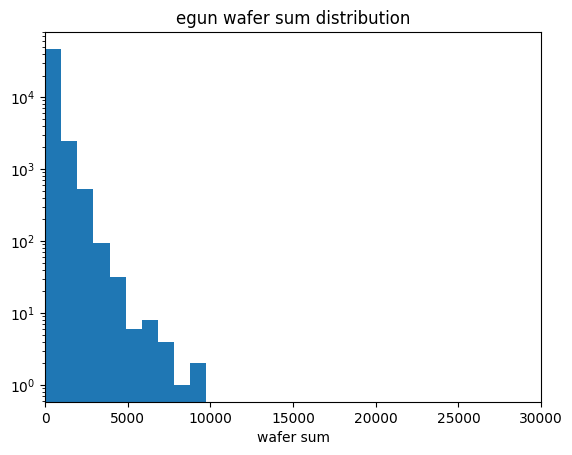

In [11]:
plt.title('egun wafer sum distribution')
plt.hist(torch.sum(egun[0:50000,0:48],dim =1),log = True)
plt.xlabel('wafer sum')
plt.xlim([0,30000])
plt.show()

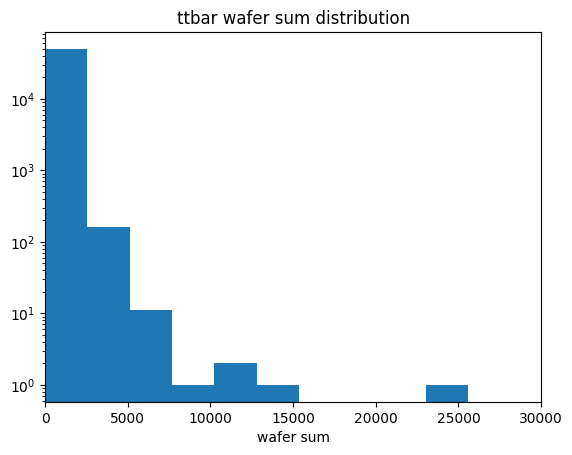

In [12]:
plt.title('ttbar wafer sum distribution')
plt.hist(torch.sum(ttbar[0:50000,0:48],dim =1),log = True)
plt.xlabel('wafer sum')
plt.xlim([0,30000])
plt.show()

# Sim Energy Distributions

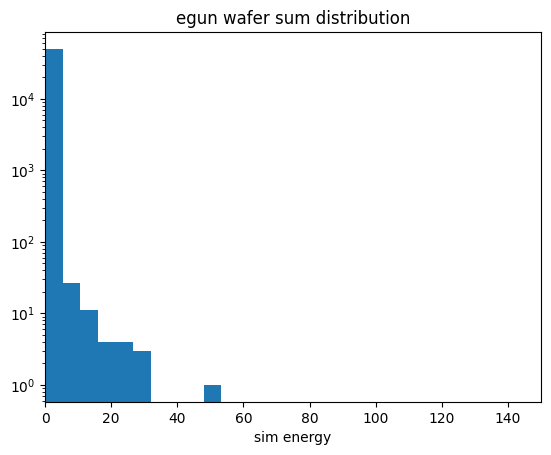

In [15]:
plt.title('egun wafer sum distribution')
plt.hist(egun[0:50000,-4],log = True)
plt.xlabel('sim energy')
plt.xlim([0,150])
plt.show()

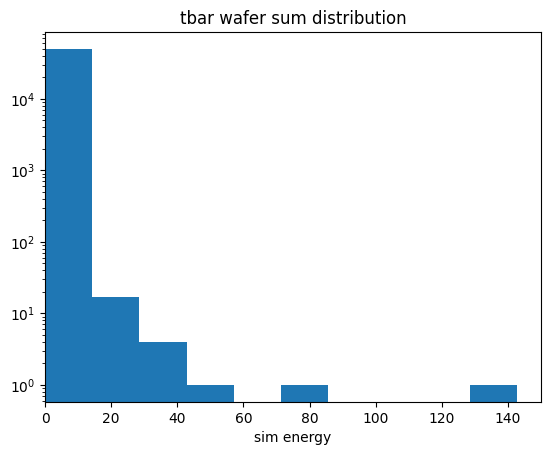

In [16]:
plt.title('tbar wafer sum distribution')
plt.hist(ttbar[0:50000,-5],log = True)
plt.xlabel('sim energy')
plt.xlim([0,150])
plt.show()

# Wafer Sum vs Sim Energy

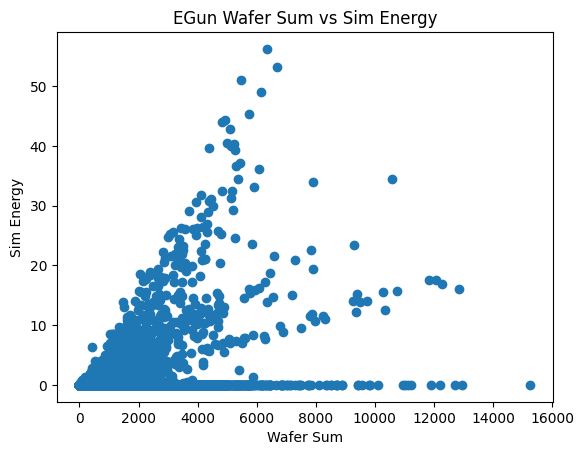

In [22]:
plt.title('EGun Wafer Sum vs Sim Energy')
plt.scatter(torch.sum(egun[0:500000,0:48],dim = 1), egun[0:500000,-4])
plt.ylabel('Sim Energy')
plt.xlabel('Wafer Sum')
plt.show()


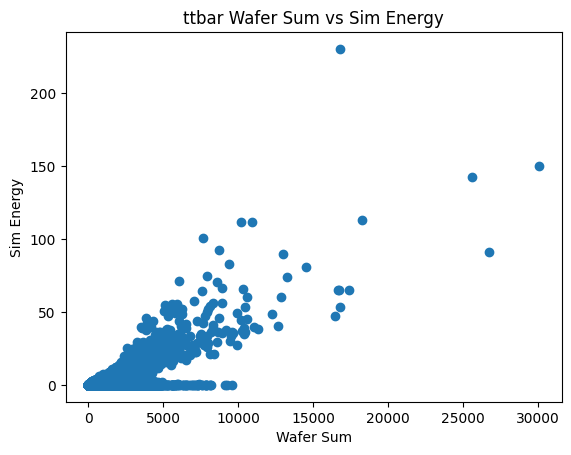

In [23]:
plt.title('ttbar Wafer Sum vs Sim Energy')
plt.scatter(torch.sum(ttbar[0:500000,0:48],dim = 1), ttbar[0:500000,-5])
plt.ylabel('Sim Energy')
plt.xlabel('Wafer Sum')
plt.show()

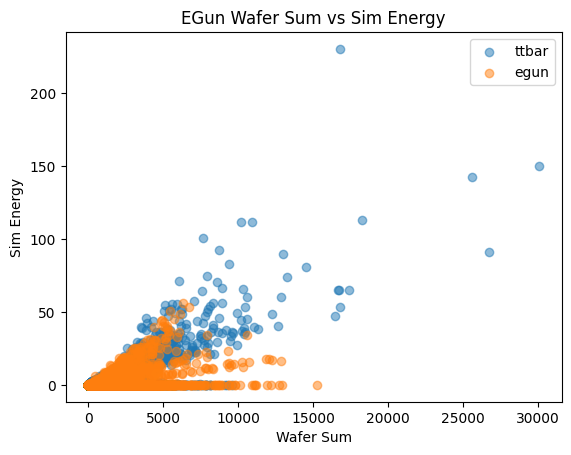

In [25]:
plt.title('ttbar Wafer Sum vs Sim Energy')
plt.scatter(torch.sum(ttbar[0:500000,0:48],dim = 1), ttbar[0:500000,-5],label = 'ttbar',alpha = 0.5)
plt.scatter(torch.sum(egun[0:500000,0:48],dim = 1), egun[0:500000,-4], label = 'egun',alpha = 0.5)
plt.title('EGun Wafer Sum vs Sim Energy')
plt.ylabel('Sim Energy')
plt.xlabel('Wafer Sum')
plt.legend()
plt.show()
